# Проект по анализу деятельности сервиса "Ненужные вещи"

Данная работа посвящена исследованию приложения, занимающегося продажей ненужных вещей. Исследование будет сконцентрировано на анализе пользовательского поведения, выделении групп пользователей по характерным признакам и проверке свзяанных с ними гипотез.

## Материалы проекта

Ссылка на презентацию: https://drive.google.com/file/d/1LW1d9_ye7WAjQTV_RtNO-cEepkRMP4yn/view?usp=sharing

Ссылка на дашборд: https://public.tableau.com/app/profile/wishmas/viz/___16717100890990/Dashboard1?publish=yes

## Декомпозиция проекта

1. **Рассмотрение и предобработка данных**
   1. Изменение названий столбцов
   2. Проверка на явные и неявные дубликаты
   3. Проверка на пропуски
   4. Проверка и изменение типов данных
   5. Выводы по итогам предобработки

2. **Исследовательский анализ**
   1. Выявление и визуализация общих закономерностей в данных
   2. Анализ поведения пользователей в контексте следующих метрик:
      * Retention Rate (возвращение пользователей в приложение)
      * Время, проведенное в приложении (выделение пользовательских сессий)
      * Частота совершения событий (онлайн приложения по дням)
      * Конверсия пользователей в целевое действие (частота совершения contacts_show)
   3. Построение наглядных таблиц и визуализаций
   4. Промежуточные выводы

3. **Сегментация пользователей**
   1. Сегментация пользователей на основании полученных инсайтов 
   2. Ранжирование групп по уровню "полезности"
   3. Выводы по сегментации

4. **Ответы на вопросы исследования**
   1. Формулирование ответа на вопрос о том, какая категория пользователей больше всего склонна 
      возвращаться в приложение
   2. Формулирование ответа на вопрос о том, какая категория пользователей обладает наилучшей
      конверсией в ключевое действие

5. **Проверка гипотез по пользовательским группам**
   1. Проверка гипотезы: "Группы пользователей разных браузеров демонстрируют разную конверсию в просмотры контактов"
      * Тестирование 
      * Вывод
   2. Проверка гипотезы: "Конверсия в целевое действие пользователей, которые нажали на рекомендованное объявление, но не      добавляли его в избранное, выше, чем пользователей, которые добавили объявление в избранное, но не кликали на рекомендации"
      * Тестирование
      * Вывод
   3. Общий вывод по проверке гипотез гипотез

6. **Подведение итогов**

## Предобработка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import numpy as np
from scipy import stats as st
import math as mth

Достанем данные из базы:

In [2]:
ms = pd.read_csv('mobile_sourсes.csv')
md = pd.read_csv('mobile_dataset.csv')

In [3]:
display(ms.head())
display(md.head())

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


Поменяем название столбцов:

In [4]:
ms = ms.rename(columns={'userId' : 'user_id'})

In [5]:
md.columns = ['e_time','e_name','user_id']

Проверим данные на наличие повторов:

In [6]:
print(f"Повторов пользователей в таблице mobile_sources:  {ms['user_id'].duplicated().sum()}")
print(f"Повторов пользователей в таблице mobile_datasets:  {md['user_id'].duplicated().sum()}")

Повторов пользователей в таблице mobile_sources:  0
Повторов пользователей в таблице mobile_datasets:  69904


Пользователи в первой таблице не повторяются, а во второй повторы есть, но они уместны, поскольку каждый пользователь мог совершить несколько действий.

Проверим, все ли пользователи из таблицы с действиями есть в первой таблице:

In [7]:
if len(md[md['user_id'].isin(ms['user_id'])]) == len(md):
    print('Данные в таблицах консистентны')
else:
    print('Данные в таблицах не консистентны')

Данные в таблицах консистентны


In [8]:
print(f"Следовательно, всего в таблицах {ms['user_id'].nunique()} уникальных пользователя(-ей)")

Следовательно, всего в таблицах 4293 уникальных пользователя(-ей)


Проверим, есть ли в таблицах пропуски:

In [9]:
print(ms.isna().sum())
print()
print(md.isna().sum())

user_id    0
source     0
dtype: int64

e_time     0
e_name     0
user_id    0
dtype: int64


Пропусков не обнаружено.

Рассмотрим типы данных в таблицах:

In [10]:
print(md.dtypes)
print()
print(ms.dtypes)

e_time     object
e_name     object
user_id    object
dtype: object

user_id    object
source     object
dtype: object


In [11]:
md['e_time'] = pd.to_datetime(md['e_time'])

Столбец с датами привели к нужному типу.

Узнаем, есть ли в таблицах явные и неявные повторы:

In [12]:
def agg_events(table):
    events_gr = table.groupby('e_name',as_index=False).agg({'user_id' : 'nunique'}).\
    sort_values(by='user_id',ascending=False).reset_index(drop=True).rename(columns={'user_id' : 'count'})
    return events_gr   

In [13]:
events_gr = agg_events(md)
events_gr

,e_name,count
0,tips_show,2801
1,map,1456
2,photos_show,1095
3,contacts_show,979
4,search_1,787
5,advert_open,751
6,search_5,663
7,search_4,474
8,favorites_add,351
9,search_6,330


In [14]:
def agg_search(x):
    if x.split('_')[0]=='search':
        return 'search'
    return x

In [15]:
md['e_name'] = md['e_name'].apply(agg_search)
md['e_name'] = md['e_name'].replace('show_contacts','contacts_show')

Разные параметры search, а также действия 'show_contacts' и 'contacts_show' в рамках данного исследования решено было приравнять.

Итоговое распределение:

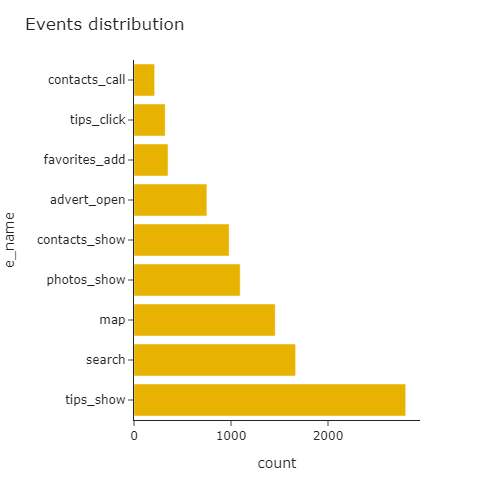

In [16]:
events_gr = agg_events(md)
fig = px.bar(events_gr,'count','e_name',color_discrete_sequence=['#e7b300'])
fig.update_layout(width=500,height=500,title='Events distribution',template='simple_white',
                 xaxis=dict(showgrid=False))
fig.show("png")

Аналогично рассмотрим распределение источников из другой таблицы:

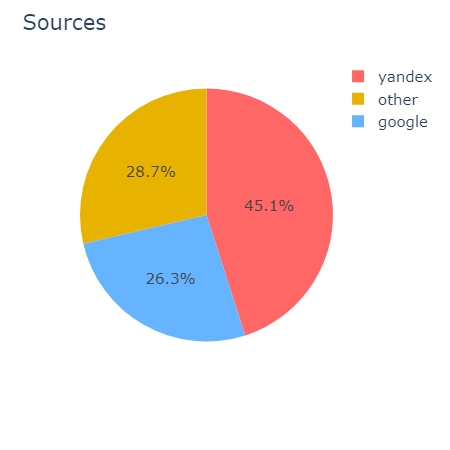

In [17]:
chan_distr = ms.groupby('source',as_index=False).agg({'user_id' : 'nunique'})
fig = px.pie(values=chan_distr['user_id'], names=chan_distr['source'],
             color_discrete_sequence=['#ff6666','#e7b300','#66b3ff'])
fig.update_layout(width=450,height=450,title='Sources',font=dict(size=15),template='plotly_white')
fig.show("png")

In [18]:
md.duplicated().sum()

0

In [19]:
ms.duplicated().sum()

0

Явных дубликатов также обнаружено не было

**Выводы по предобработке:** удалось почистить данные от повторов, а также убедиться, что таблицы консистентны и не содержат дубликатов. Было посчитано количество уникальных пользователей за рассматриваемый период. Кроме того, сами таблицы были приведены в более удобочитаемый вид через изменение названий столбцов. Наконец были построены визуализации, показывающие, как распределены разные категориальные переменные. После этого можно было переходить к следующему этапу.

## Исследовательский анализ

Перейдем к непосредственному исследованию данных. Сперва объединим таблицы и узнаем, какой период времени охватывают наблюдения:

In [20]:
total = ms.merge(md,on='user_id',how='left')

In [21]:
print(f"Начало наблюдений: {total['e_time'].min()}")
print(f"Конец наблюдений: {total['e_time'].max()}")
print(f"Разница: {total['e_time'].max() - total['e_time'].min()}")

Начало наблюдений: 2019-10-07 00:00:00.431357
Конец наблюдений: 2019-11-03 23:58:12.532487
Разница: 27 days 23:58:12.101130


Рассчитаем retention rate для всех пользователей приложения. Для этого добавим в таблицу столбцы 'lifetime' и 'first_session', обозначающие количество дней, прошедшее между текущим и первым действиями пользователя, и время совершения первого действия соответственно. Также обозначим отдельной переменной дату совершения действия - она пригодится нам позднее:

In [22]:
fs = total.groupby('user_id',as_index=False).agg({'e_time' : 'min'}).rename(columns={'e_time':'first_session'})
total = total.merge(fs,on='user_id',how='left')

In [23]:
total['lifetime'] = (total['e_time'] - total['first_session']).dt.days
total['e_date'] = total['e_time'].dt.date

Построим сводную таблицу и отобразим по ней тепловую карту, показывающую retention rate пользователей по лайфтайму:

In [24]:
users_grouped = total.pivot_table(index=total['first_session'].dt.date,
                                  columns='lifetime', values='user_id', aggfunc='nunique').fillna(0)
users_grouped = users_grouped.div(users_grouped[0],axis=0).drop(columns=0)

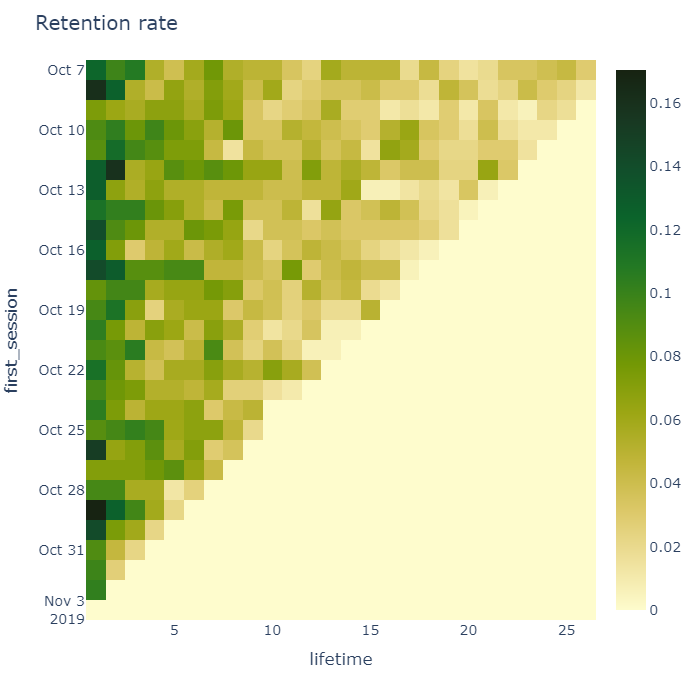

In [25]:
fig = px.imshow(users_grouped,color_continuous_scale=px.colors.sequential.speed)
fig.update_layout(width=700,height=700,title='Retention rate',font=dict(size=14))
fig.show("png")

**Вывод:** возвращаемость пользователей оставляет желать лучшего. Уже на второй день после начала пользования приложением в него возвращаются лишь около 10 - 12% юзеров, а уже через неделю этот показатель опускается приблизительно  до 2 - 5%. Несмотря на то, что специфика приложения не располагает к тому, чтобы пользователи применяли его на регулярной основе, стоит все же рассмотреть добавление мотиваторов, подталкивающих к более стабильному посещению продукта (всплывающие напоминания, подборки с рекомендациями, акции и проч).

Перейдем к рассмотрению пользовательских сессий. Рассчитаем среднюю и медианную длину сессии для всех пользователей:

In [26]:
def dif(series):
    return np.around((max(series) - min(series)).total_seconds() / 60,3)

Отсортируем таблицу по пользователям и времени и пронумеруем пользовательские сессии по дням:

In [27]:
total = total.sort_values(by=['user_id', 'e_time'])

In [28]:
total['session_number'] = total.groupby('user_id')['e_date'].rank(method='dense')

In [29]:
total.head()

,user_id,source,e_time,e_name,first_session,lifetime,e_date,session_number
2171,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45.989359,tips_show,2019-10-07 13:39:45.989359,0,2019-10-07,1.0
2172,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31.052909,tips_show,2019-10-07 13:39:45.989359,0,2019-10-07,1.0
2173,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:05.722489,tips_show,2019-10-07 13:39:45.989359,0,2019-10-07,1.0
2174,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:20.735461,tips_show,2019-10-07 13:39:45.989359,0,2019-10-07,1.0
2175,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:30.917502,tips_show,2019-10-07 13:39:45.989359,0,2019-10-07,1.0


Выбор в пользу такого деления был сделан, поскольку процесс подбора покупок, сравнения цен и обзвона продавцов может быть достаточно протяженным и в теории легко способен растянуться на весь день с небольшими перерывами.

Теперь рассчитаем среднюю длину каждой сессии для каждого пользователя и сохраним результат в словарь:

In [30]:
all_users = total.user_id.unique()
libr = {}
for u in all_users:
    a = total.query('user_id == @u')
    a_gr = a.groupby('session_number').agg({'e_time':dif})
    libr[u] = a_gr

Наконец найдем среднюю сессию для каждого пользователя и посчитаем по ним общее среднее и общее медианное значение по таблице:

In [31]:
avg_session_time = np.around(np.mean([libr[i]['e_time'].mean() for i in libr.keys()]),5)
median_session_time = np.around(np.median([libr[i]['e_time'].mean() for i in libr.keys()]),5)
print(f'Среднее время в приложении по всем пользователям: {avg_session_time} минут')
print(f'Медианное время в приложении по всем пользователям: {median_session_time} минут')

Среднее время в приложении по всем пользователям: 62.66801 минут
Медианное время в приложении по всем пользователям: 16.449 минут


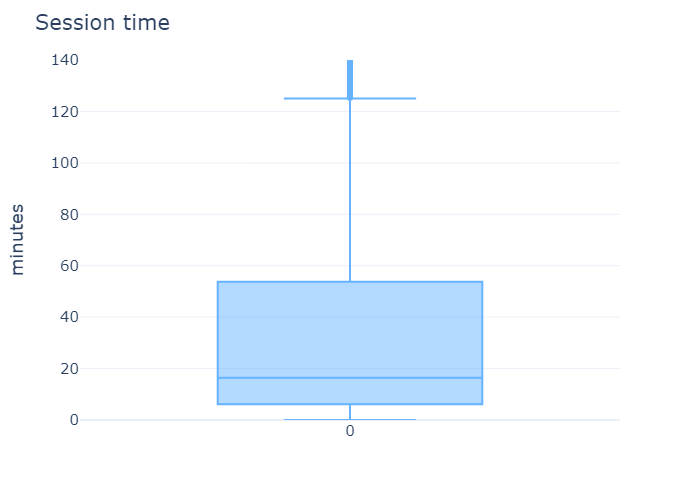

In [32]:
fig = px.box([libr[i]['e_time'].mean() for i in libr.keys()],color_discrete_sequence=['#66b3ff'])
fig.update_layout(width=700,height=500,title='Session time',font=dict(size=15),template='plotly_white',
                 yaxis_title='minutes',xaxis_title=None)
fig.update_yaxes(range = [0,140])
fig.show("png")

**Вывод:** вопреки сделанному ранее предположению, большая часть пользовательских сессий все же находится в диапазоне от 6 - 10 минут до часа. Впрочем, имеется и серьезное количество выбросов, созданных пользователями, потратившими в приложении более 2 часов за раз. Отметим также высокое количество 'нулевых сессий', состоящих только из одного действия. Скорее всего, совершавшие их люди заходили в приложение по ошибке или просто жали на уведомление, а потом сразу же выходили. 

Обратим внимание на частоту совершения событий и на число ежедневно активных поользователей приложения. Построим отдельную таблицу с информацией о том, сколько пользователей заходило в приложение в каждый из имеющихся дней, с разбивкой на старых пользователей (которые до этого уже хоть раз посещали приложение) и новых (для которых эта сессия - первая).

In [33]:
users_number = total.groupby('e_date',as_index=False).agg({'user_id' : 'nunique'}).rename(columns={'user_id':'total_users'})
users_number['new_users'] = total.query('lifetime == 0').groupby('e_date',as_index=False).\
agg({'user_id' : 'nunique'}).rename(columns={'user_id':'new_users'})['new_users']
users_number['old_users'] = users_number['total_users'] - users_number['new_users']
users_number.head()

,e_date,total_users,new_users,old_users
0,2019-10-07,204,204,0
1,2019-10-08,204,192,12
2,2019-10-09,227,192,35
3,2019-10-10,233,188,45
4,2019-10-11,206,151,55


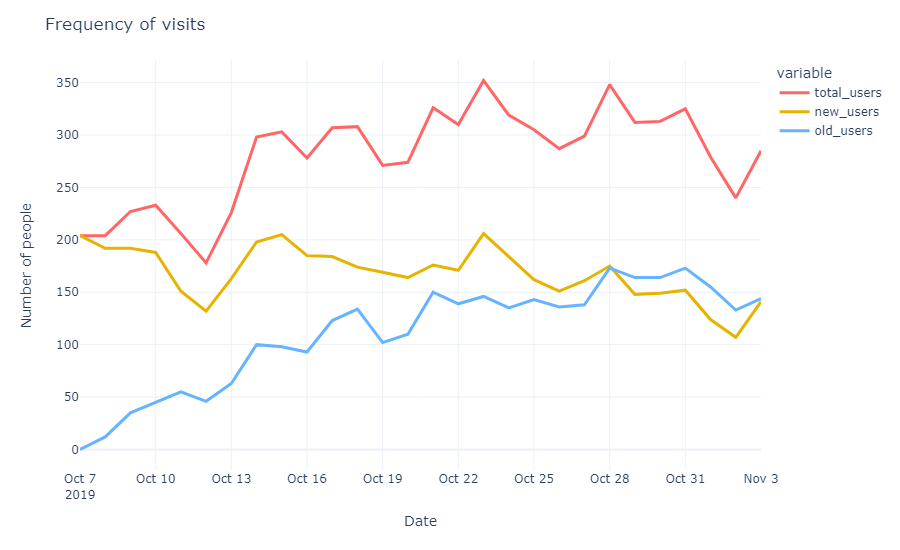

In [34]:
fig = px.line(users_number, x='e_date', y=users_number.columns[1:4],color_discrete_sequence=['#ff6666','#e7b300','#66b3ff'])
fig.update_layout(width=900,height=550,template='plotly_white',title='Frequency of visits',
                 xaxis_title='Date',yaxis_title='Number of people')
fig.update_traces(line=dict(width=3))
fig.show("png")

**Вывод:** суммарное количество ежедневных пользователей приложения остается относительно стабильным на протяжении всего времени наблюдения, варьируясь в диапазоне от 178 до 352 человек. Из этих людей большую часть как правило составляют новые пользователи, из которых лишь небольшая часть остается в приложении. Однако по графику видно, что устойчивая база постоянных пользователей все же постепенно растет, и ей нужно в этом способствовать. Чем больше решений будет принято для удержания людей в продукте и мотивирования их на совершение повторных покупок, тем лучше пойдут дела у компании.

Наконец рассмотрим конверсию пользователей в целевое действие: просмотр номера телефона продавца. Для этого просто разделим количество уникальных пользователей, хоть раз совершивших нужное действие, на общее их количество:

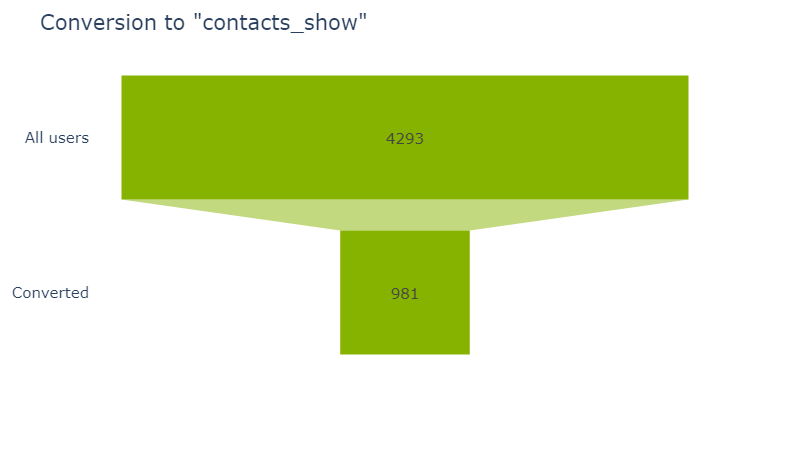

Конверсия в целевое действие: 22.85%


In [35]:
converted = total[total['e_name']=='contacts_show']['user_id'].nunique()
conversion = np.around(converted / len(all_users),4)*100
fig = px.funnel(y=['All users','Converted'],x=[len(all_users),converted],color_discrete_sequence=['#86b300'])
fig.update_layout(width=800,height=450,title='Conversion to "contacts_show"',yaxis_title=None,
                 font=dict(size=15),template='plotly_white')
fig.show("png")
print(f'Конверсия в целевое действие: {conversion}%')

**Вывод:** результат оказался достаточно неплохим: приблизительно каждый пятый пользователеь приложения так или иначе доходил до записи номера телефона продавца. Выделить универсальный пользовательский путь в данной ситуации тяжело, поскольку прийти к такому результату можно несколькими разными способами, однако определение такого маршрута с наибольшей конверсией могло бы стать хорошим подспорьем для изменения архитектуры приложения в будущем.

**Вывод по исследовательскому анализу:** результат исследования пользователей в совокупности показал достаточно неплохие результаты. С одной стороны, ретеншен оказался сравнительно низким и продемонстрировал слабую возвращаемость юзеров в продукт, но с другой стороны, графики зафиксировали устойчивый рост числа пользователей, совершающих вторую и более покупку. Также удалось с высокой уверенностью вывести некоторые паттерны поведения пользователей в рамках сессий и зафиксировать хорошую конверсию в целевое действие, которую, конечно, еще можно и нужно улучшать.

## Сегментация 

На этом этапе будем делить пользователей на группы в соответствии с информацией, полученной ранее, и исследовать эти группы обособленно, с целью определить, кто является целевой аудиторией приложения, а кто - побочной. 

Хорошей идеей будет выделить в качестве сегментов группы пользователей с разным средним временем сессий, уже бегло рассмотренным ранее. Такое деление позволяет:
   1. Быть уверенным, что пользователи в разных группах не будут пересекаться, поскольку деление однозначно
   2. Реально воздействовать на получившиеся группы, поскольку пользователям с разным стилем 
      использования приложения лучше подходит разный интерфейс, который можно под них подстраивать

Используем перцентили, чтобы ровно поделить всех пользователей на 4 приблизительно одинаковые группы:

In [36]:
np.percentile([libr[i]['e_time'].mean() for i in libr.keys()],[25,50,75,99])

array([  6.124 ,  16.449 ,  53.704 , 654.9686])

In [37]:
fast_users = {}
normal_users = {}
slow_users = {}
too_slow_users = {}

for k in libr.keys():
    if libr[k]['e_time'].mean() <= 6:
        fast_users[k] = libr[k]['e_time'].mean()
    elif libr[k]['e_time'].mean() <= 16:
        normal_users[k] = libr[k]['e_time'].mean()
    elif libr[k]['e_time'].mean() <= 53:
        slow_users[k] = libr[k]['e_time'].mean()
    else:
        too_slow_users[k] = libr[k]['e_time'].mean()
        
print(f'Размер таблицы fast users: {len(fast_users)}')
print(f'Размер таблицы normal users: {len(normal_users)}')
print(f'Размер таблицы slow users: {len(slow_users)}')
print(f'Размер таблицы too slow users: {len(too_slow_users)}')

Размер таблицы fast users: 1054
Размер таблицы normal users: 1068
Размер таблицы slow users: 1086
Размер таблицы too slow users: 1085


Получились отдельные таблицы для пользователей со средними сессиями до 6 минут, от 6 до 16 минут, от 16 до 53 минут и от 53 минут и выше.

In [38]:
def make_df(x):
    x_df = pd.DataFrame.from_dict(x, orient='index')
    x_df['user_id'] = x_df.index
    x_df = x_df.reset_index(drop=True)
    x_df.columns = ['avg_session','user_id']
    x_df = x_df[['user_id','avg_session']]
    return x_df

In [39]:
fast_users = make_df(fast_users)
normal_users = make_df(normal_users)
slow_users = make_df(slow_users)
too_slow_users = make_df(too_slow_users)

In [40]:
fast_users_total = total[total['user_id'].isin(fast_users['user_id'])]
normal_users_total = total[total['user_id'].isin(normal_users['user_id'])]
slow_users_total = total[total['user_id'].isin(slow_users['user_id'])]
too_slow_users_total = total[total['user_id'].isin(too_slow_users['user_id'])]

Теперь, когда сегментирование окончено, можно переходить к сравнительному анализу. Для начала, рассчитаем конверсию в целевое действие по каждой из групп:

In [41]:
box = [fast_users_total,normal_users_total,slow_users_total,too_slow_users_total]
box_names = ['fast users','normal users','slow users','too slow users']

In [42]:
conversions = {}
for k in range(len(box)):
    t = box[k]
    tt = box_names[k]
    conversions[tt] = np.around(t[t['e_name']=='contacts_show']['user_id'].nunique() / t['user_id'].nunique(),3)*100
    print(f"В группе {tt} конверсия составляет {conversions[tt]}%")

В группе fast users конверсия составляет 15.1%
В группе normal users конверсия составляет 16.0%
В группе slow users конверсия составляет 22.8%
В группе too slow users конверсия составляет 37.1%


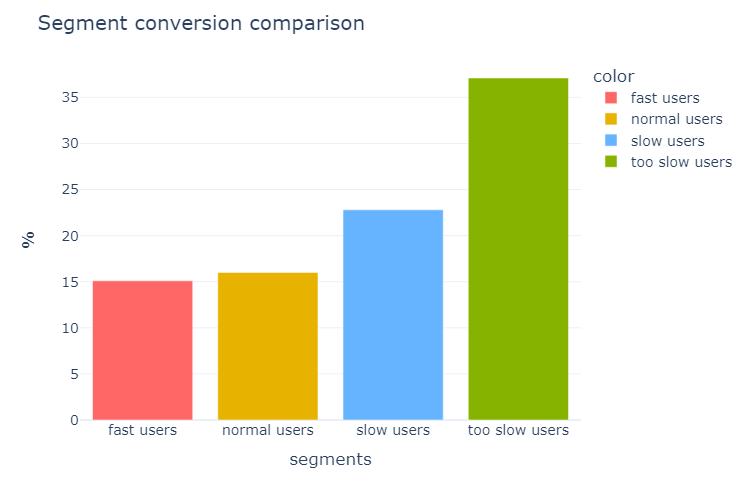

In [43]:
fig = px.bar(x=[i for i in conversions.keys()],y=[i for i in conversions.values()],
            color=[i for i in conversions.keys()],color_discrete_sequence=['#ff6666','#e7b300','#66b3ff','#86b300'])
fig.update_layout(width=750,height=500,title='Segment conversion comparison',xaxis_title='segments',yaxis_title='%',
                 font=dict(size=14),template='plotly_white')
fig.show("png")

**Вывод:** неожиданно, но группа с самыми длинными сессиями показала ощутимо более высокий результат, чем прочие. Да и в целом, прослеживается тенденция, что чем дольше средняя сессия, тем больше вероятноть, что в какой-то момент пользователь все же совершит нужное действие. Возможно, это связано с тем, что за более длинный промежуток времени пользователь совершает большее количество всех возможных действий, что статистически повышает его вероятность кликнуть на просмотр контакта. Так или иначе, данный факт стоит взять на заметку и, к примеру, создать больше активностей, которым пользователи с большим количеством свободного времени могли бы себя посвятить. 

Аналогично рассмотрим retention rate с разбивкой по группам:

In [44]:
def show_retention(x,title):
    users_grouped = x.pivot_table(index=x['first_session'].dt.date,
                                  columns='lifetime', values='user_id', aggfunc='nunique').fillna(0)
    users_grouped = users_grouped.div(users_grouped[0],axis=0).drop(columns=0)
    fig = px.imshow(users_grouped,color_continuous_scale=px.colors.sequential.speed)
    fig.update_layout(width=700,height=500,title=title,font=dict(size=14))
    fig.show("png")

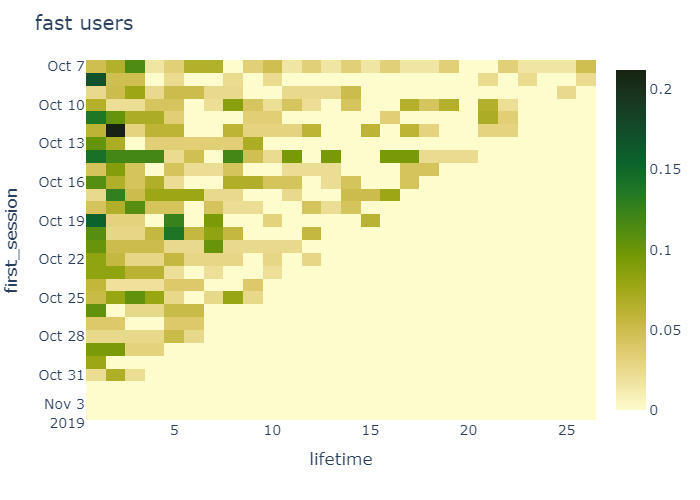

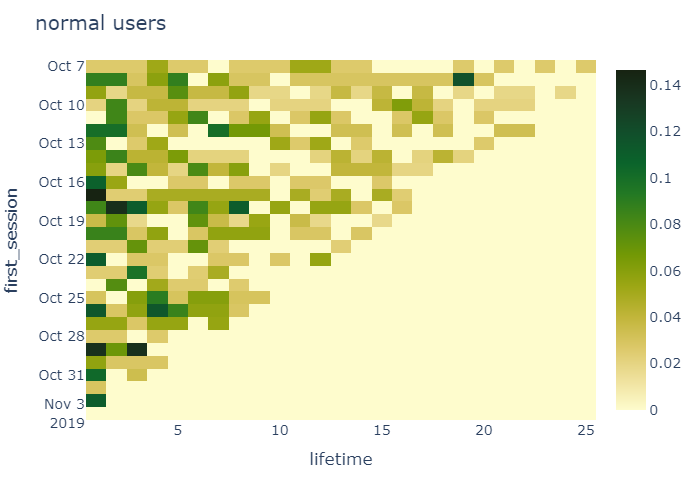

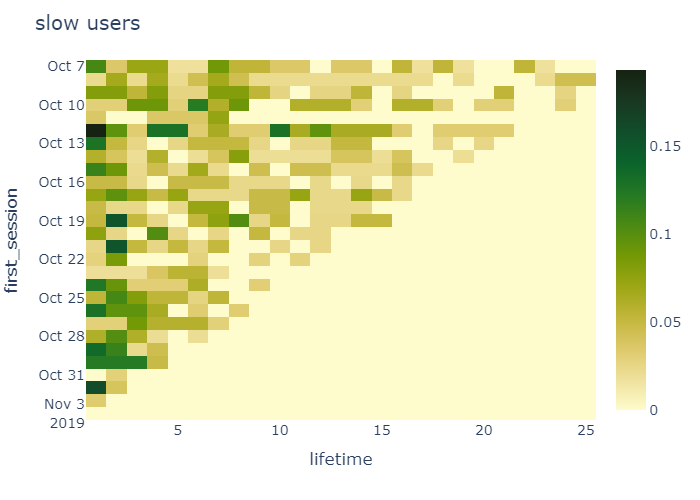

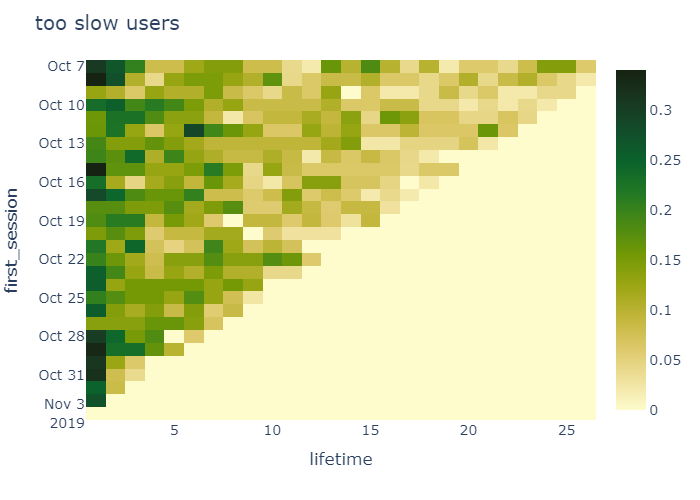

In [45]:
show_retention(fast_users_total,'fast users')
show_retention(normal_users_total,'normal users')
show_retention(slow_users_total,'slow users')
show_retention(too_slow_users_total,'too slow users')

**Вывод:** группа с самыми длинными сессиями и на этот раз показала впечатляющий результат с возращаемостью до 30% во второй день, что значительно выше среднего показателя по всем данным и показателей трех других групп, стабильно высокой возвращаемостью в течение всей первой недели и неплохой возвращаемостью на более поздних этапах. Три другие группы здесь показали себя примерно одинаково: чуть лучше выступил сегмент normal users, чуть хуже - два оставшихся. Но в целом, значимой разницы между ними выявить не удалось.

**Вывод по сегментации:** определенно, по результатам данного этапа работы можно заключить, что ключевой аудиторией приложения должны являться пользователи, которые каждый раз проводят в нем больше времени, чем те, которые принимают решения и действуют за считанные минуты. Для них можно слегка исправить архитектуру, убедиться, что в приложении комфотрно находиться длительное время, добавить темную тему и дополнительные настройки интерфейса. 

## Ответы на основные вопросы исследования

#### Пользователели, проводящие в приложении больше времени в рамках каждой сессии (от 53 минут и дольше), склонны возвращаться к нему чаще, чем пользователи с короткими сессиями.

#### Пользователи с длинными сессиями (от 53 минут и дольше) чаще открывают номер продавца, чем пользователи с короткими сессиями.

### Вывод:

Целевой аудиторией компании являются пользователи с длинными сессиями (в контексте исследования - те, кто суммарно проводит в приложении более 53 минут в день). Они более вдумчиво подходят к использования продукта, иногда берут паузы, но тем не менее часто доходят до финального этапа. Они часто склонны возвращаться к использованию приложения через день, через два и даже через неделю после установки, что говорит о том, что они к нему привыкают. В любом случае, на этих пользователях стоит состредоточиться и создать для них наиболее комфортные условия. Возможно, им трудно определиться или найти то, что необходимо. В таком случае, имеет смысл усовершенствовать поиск и расширить систему рекомендаций. Для более точного принятия решений, будет неплохо провести серию интервью с такими пользователями, чтобы лучше понять их user experience.

## Проверка гипотез

Чтобы окончательно поставить точку в данном исследовании, необходимо провести проверку двух гипотез, которые потенциально могут быть полезны для улучшения приложения.

Начнем с гипотезы о разности конверсии в целевое действие у пользователей Гугл и Яндекс:

**H-0:** Конверсия пользователей разных браузеров статистически не отличается.

**H-1:** У пользователей разных браузеров статистически значимо разная конверсия.

In [46]:
def z_test(successes1, successes2, trials1, trials2, alpha=0.05):
    p1 = successes1 / trials1
    p2 = successes2 / trials2

    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2)) 
    distr = st.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2 
    print('p-значение: ', p_value)

    if (p_value < alpha): 
        display('Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия')
    else:
        display('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет')

In [47]:
converted_users = total[total['e_name']=='contacts_show']['user_id'].unique()

In [48]:
def mark_convert(x):
    if x in converted_users:
        return 1
    return 0

In [49]:
total['converted'] = total['user_id'].apply(mark_convert)

In [50]:
yandex_total = total[total['source']=='yandex']
google_total = total[total['source']=='google']

In [51]:
yandex_users = yandex_total[['user_id','converted']].drop_duplicates()
google_users = google_total[['user_id','converted']].drop_duplicates()

In [52]:
print(f"Конверсия у пользователей Яндекса: {yandex_users['converted'].mean()}")
print(f"Конверсия у пользователей Гугл: {google_users['converted'].mean()}")

Конверсия у пользователей Яндекса: 0.24715615305067218
Конверсия у пользователей Гугл: 0.24357838795394154


In [53]:
z_test(yandex_users['converted'].sum(), google_users['converted'].sum(), yandex_users['converted'].count(),
                                         google_users['converted'].count(), alpha=0.05)

p-значение:  0.8244316027993777


'Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет'

**Вывод:** коверсия в группах пользователей разных браузеров оказалась чрезвычайно близкой с различием менее процента. Статистический тест также опроверг наличие какой-либо существенной разницы. Все свидетельствует о том, что браузер не имеет никакого влияния на дальнейшее поведение человека.

Теперь перейдем к проверке другой гипотезы: "Конверсия в целевое действие пользователей, которые нажали на рекомендованное объявление, но не добавляли его в избранное, выше, чем пользователей, которые добавили объявление в избранное, но не кликали на рекомендации".

**H-0:** У пользователей, использующих только рекомендации, и пользователей, добавляющих объявления в избранное без рекомендаций, одинаковая конверсия в целевое действие.

**H-1:** Конверсия пользователей, использующих только рекомендации, и пользователей, добавляющих объявления в избранное без рекомендаций, отличается.

Построим выборки таким образом, чтобы в одной группе были только пользователи, использовавшие 'tips_click', но не использовавшие 'favorites_add', а во второй - наоборот. Таким образом, выборки не будут пересекаться.

In [54]:
tips_click_users = total[total['e_name']=='tips_click']['user_id'].unique()
favotite_add_users = total[total['e_name']=='favorites_add']['user_id'].unique()

In [55]:
tips_click_total = total[['user_id','converted']].\
query('user_id in @tips_click_users').query('user_id not in @favotite_add_users').drop_duplicates()

favotite_add_total = total[['user_id','converted']].\
query('user_id in @favotite_add_users').query('user_id not in @tips_click_users').drop_duplicates()

In [56]:
print(f"Конверсия у пользователей, полагающихся на рекомендации: {tips_click_total['converted'].mean()}")
print(f"Конверсия у пользователей, использующих вкладку 'избранное': {favotite_add_total['converted'].mean()}")

Конверсия у пользователей, полагающихся на рекомендации: 0.296551724137931
Конверсия у пользователей, использующих вкладку 'избранное': 0.3824451410658307


In [57]:
z_test(tips_click_total['converted'].sum(), favotite_add_total['converted'].sum(), tips_click_total['converted'].count(),
                                         favotite_add_total['converted'].count(), alpha=0.05)

p-значение:  0.025592951043686973


'Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия'

**Вывод:** проверка этой гипотезы показала, что пользователи, добавляющие товары в избранное вместо того, чтобы проходить по рекомендованным объявлениям, существенно чаще в конечном счете записывают номера продавцов этих товаров. Конверсия таких юзеров оказалась почти на 9% выше, и статистический тест также показал значимое расхождение.

**Вывод по проверке гипотез:** предположение о различии пользователей разных браузеров себя не оправдало, а вот идея о том, что конверсия у пользователей, применяющих функцию "избранное", выше, чем у тех, кто руководствуется лишь рекомендациями, оказалась верной. Этот факт можно использовать для внесения изменений в приложение: имеет смысл чаще напоминать пользователям, что они могут сохранять понравившиеся товары. Также можно сделать вкладку с избранными объявлениями более интерактивной, добавить возможность создавать папки с объявлениями разной тематики, фильтровать их, делать поиск по объявлениям и т.д.

## Подведение итогов

Проведенное исследование позволило многое понять в работе приложения и выявить ключевые факторы, значимые для его успеха. 

**В процессе работы удалось:**
   1. Провести сегментацию пользователей и выявить целевую аудиторию приложения
   2. Подсчитать retention rate всех пользователей и отдельных сегментов
   3. Подсчитать конвесию всех пользователей и отдельных сегментов
   4. Понять, как часто пользователи посещают приложение, какой онлайн у него 
      на ежедневной основе и каков этот онлайн по составу
   5. Рассчитать пользовательсткие сессии и их продолжительность
   6. Проверить важные для бизнеса гипотезы и сформулировать выводы

**Рекомендации:**
   1. Сделать приложение более пригодным для длительного использования:
      * Добавить несколько тем для бэкграунда
      * Упростить интерфейс
      * Добавить больше возможных активностей    
   2. Повысить популярность вкладки "избранное" и расширить ее функционал:
      * Добавить возможность разбивать сохраненные объявления на папки
      * Добавить поиск и фильтры по избранному
      * Добавить напоминания о возможности сохранить понравившееся объявление    
   3. Повысить возвращаемость клиентов:
      * Провести серию акций, мотивирующих клиентов на повторуную покупку
      * Добавить бонусы за просмотр объявлений в приложении
      * Присылать пуш-уведомления пользователям, давно не заходившим в приложение